In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set_theme(style="white", context="talk")
rs = np.random.RandomState(8)

In [139]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/383523/lesson_3_data__1_.csv', encoding='windows-1251')

In [140]:
df.head()

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,...,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,...,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,...,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,...,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nє 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta
3,1245,120070616003074261,1,2007/06/16,0.550961,95931501,9593150,28914,101070640100,1010706401,...,10107064,10107,101,1,1.03,2.0,28914,FIDEO FIDEUБ 500 Brand_7,PASTA ALIMENTICIA SE,pasta
4,1246,120070519001018477,1,2007/05/19,0.804954,93265591,9326559,159867,101070640100,1010706401,...,10107064,10107,101,1,1.09,1.0,159867,MACARRONES GRATINAR 5 Brand_2,PASTA ALIMENTICIA SE,pasta


In [141]:
user_df = df[['tc', 'art_sp']]

In [142]:
user_df

,tc,art_sp
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2
...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand


In [143]:
user_df = user_df.rename(columns={'tc': 'user_id', 'art_sp': 'brand_info'})

In [144]:
user_df.head()

,user_id,brand_info
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2


In [145]:
def split_brand(brand_name_data):
    return brand_name_data.split(' ')[-1]

In [146]:
user_df['brand_name'] = user_df.brand_info.apply(split_brand)

In [147]:
# user_df['brand_name'] = user_df.brand_info.apply(lambda x: x.split(' ')[-1])
# используем lambda функцию, чтобы разрезать строку по пробелу и взять последний элемент

In [148]:
user_df.head()

,user_id,brand_info,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2


In [149]:
users_purchases = user_df.groupby('user_id', as_index=False) \
    .agg({'brand_name': 'count'}) \
    .rename(columns={'brand_name': 'purchases'})

In [150]:
users_purchases.describe()

,user_id,purchases
count,1.176400e+04,11764.000000
mean,7.690517e+07,4.091210
std,1.622210e+08,4.573143
min,-1.236395e+09,1.000000
25%,1.503761e+07,1.000000
50%,4.682179e+07,2.000000
75%,9.311601e+07,5.000000
max,1.408849e+09,60.000000


In [151]:
users_purchases.purchases.median()

2.0

In [152]:
users_purchases=users_purchases.query('purchases >= 5')

In [153]:
users_purchases.median()

user_id      28425471.0
purchases           7.0
dtype: float64

In [154]:
users_purchases.head()

,user_id,purchases
1,1031,6
2,4241,5
11,25971,7
14,40911,27
16,45181,5


In [155]:
user_df.groupby(['user_id', 'brand_name'], as_index=False)\
    .agg({'brand_info': 'count'})\
    .query('user_id==1031')

,user_id,brand_name,brand_info
1,1031,Brand_3,1
2,1031,Store_Brand,5


In [156]:
lovely_brand_purchases_df = user_df.groupby(['user_id', 'brand_name'], as_index=False) \
    .agg({'brand_info': 'count'}) \
    .sort_values(['user_id', 'brand_info'], ascending=[False, False]) \
    .groupby('user_id') \
    .head(1) \
    .rename(columns={'brand_name': 'lovely_brand','brand_info': 'lovely_brand_purchases'})

In [157]:
lovely_brand_purchases_df

,user_id,lovely_brand,lovely_brand_purchases
18187,1408849249,Store_Brand,1
18186,1408840919,Store_Brand,1
18185,1408832719,Brand_4,3
18184,1408825059,Brand_1,1
18183,1408817589,Store_Brand,2
...,...,...,...
6,17312,Brand_1,1
5,17311,Brand_4,2
3,4241,Brand_4,3
2,1031,Store_Brand,5


In [158]:
users_unique_brands = user_df.groupby('user_id', as_index=False) \
    .agg({'brand_name': pd.Series.nunique}) \
    .rename(columns={'brand_name': 'unique_brands'})

In [159]:
users_unique_brands

,user_id,unique_brands
0,-1236394515,1
1,1031,2
2,4241,2
3,17311,1
4,17312,2
...,...,...
11759,1408817589,2
11760,1408825059,1
11761,1408832719,1
11762,1408840919,1


In [160]:
??pd.DataFrame.merge

In [161]:
loyalty_df = users_purchases \
    .merge(users_unique_brands, on='user_id', how='inner') \
    .merge(lovely_brand_purchases_df, on='user_id', how='inner')

In [162]:
loyalty_df

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases
0,1031,6,2,Store_Brand,5
1,4241,5,2,Brand_4,3
2,25971,7,2,Store_Brand,5
3,40911,27,5,Brand_4,19
4,45181,5,4,Store_Brand,2
...,...,...,...,...,...
3378,1408767189,5,1,Brand_4,5
3379,1408783189,10,2,Store_Brand,8
3380,1408783379,6,2,Brand_1,4
3381,1408798879,8,3,Store_Brand,4


In [163]:
loyal_users = loyalty_df[loyalty_df.unique_brands == 1]

In [164]:
loyalty_df['loyalty_score'] = loyalty_df.lovely_brand_purchases / loyalty_df.purchases

In [165]:
loyal_users

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases
13,86281,14,1,Brand_4,14
18,94961,6,1,Brand_4,6
29,132061,9,1,Brand_4,9
30,134281,6,1,Brand_4,6
35,157311,12,1,Brand_4,12
...,...,...,...,...,...
3372,1010244089,9,1,Store_Brand,9
3374,1010247239,5,1,Brand_4,5
3376,1010274559,5,1,Brand_4,5
3377,1110091379,5,1,Brand_1,5


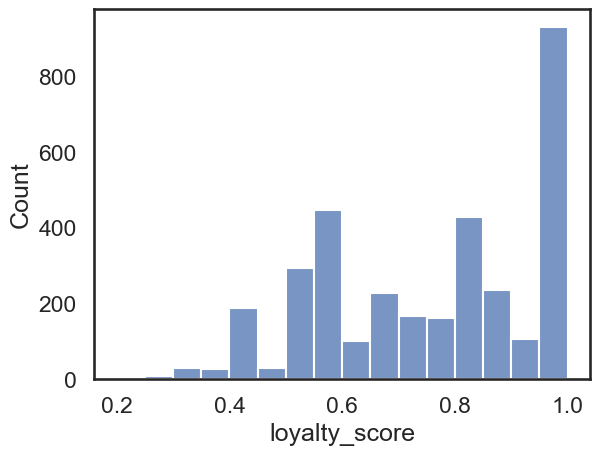

In [166]:
ax = sns.histplot(loyalty_df.loyalty_score)

In [167]:
loyalty_df.loyalty_score.describe()

count    3383.000000
mean        0.759356
std         0.198331
min         0.200000
25%         0.600000
50%         0.800000
75%         1.000000
max         1.000000
Name: loyalty_score, dtype: float64

In [168]:
loyalty_df.query('loyalty_score > 0.9 and lovely_brand == "Brand_4"').shape[0]

767

In [169]:
brands_loyalty = loyalty_df.groupby('lovely_brand', as_index=False) \
    .agg({'loyalty_score': 'median', 'user_id': 'count'})\
    .rename(columns={'user_id':'user_count'})\
    .sort_values(by='loyalty_score', ascending=False)

In [170]:
brands_loyalty

,lovely_brand,loyalty_score,user_count
3,Brand_4,0.818182,2041
6,Store_Brand,0.750000,715
0,Brand_1,0.679487,410
1,Brand_2,0.600000,88
4,Brand_5,0.600000,5
2,Brand_3,0.500000,115
5,Brand_7,0.444444,9


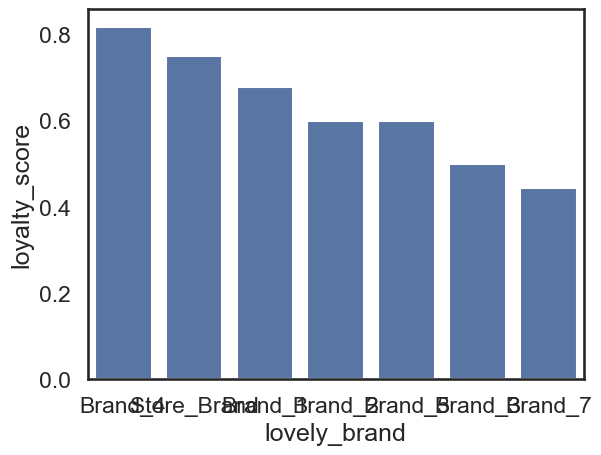

In [171]:
ax=sns.barplot(x="lovely_brand", y="loyalty_score", data=brands_loyalty)

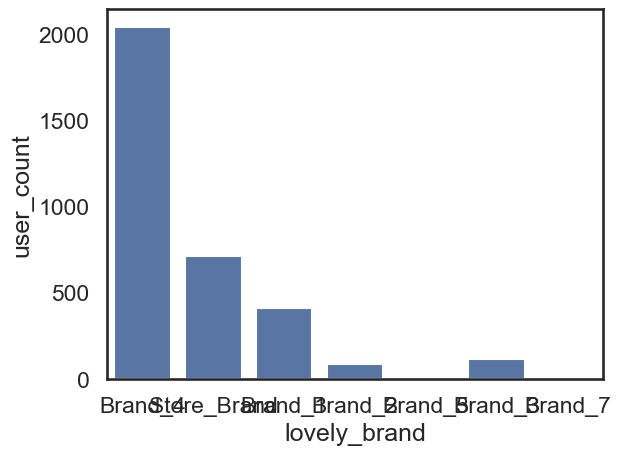

In [172]:
ax2=sns.barplot(x="lovely_brand", y="user_count", data=brands_loyalty)

Вывод: Бренд 4 имеет максимальную лояльность (767 покупателей из 3383)

journey_id – уникальный id поездки
user_id – id пользователя
driver_id – id водителя
taxi_id – id машины
icon – тип поездки
start_type – тип заказа (asap, reserved, delayed)
start_at – время начала поездки
start_lat – исходное местоположение пользователя, широта
start_lon – исходное местоположение пользователя, долгота
end_at – время окончания поездки
end_lat – итоговое местоположение, широта
end_lon – итоговое местоположение, долгота
end_state – состояние заказа
driver_start_lat – исходное местоположение водителя, широта
driver_start_lon – исходное местоположение водителя, долгота
arrived_at – время прибытия водителя
source – платформа, с которой сделан заказ
driver_score – оценка водителя клиентом
rider_score – оценка клиента водителем

In [174]:
taxi

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-07-31 13:15:00,"-12,08974075","-77,04699707",2010-07-31 13:27:00,"-12,08352661","-77,05044556",drop off,"-12,08973527","-77,04787016",2010-07-31 13:15:00,iPhone,5.0,5.0
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-10-02 05:26:00,"-12,09253011","-77,02875271",2010-10-02 05:56:00,"-12,07776001","-77,05623798",drop off,"-12,10639693","-77,04028948",2010-10-02 05:39:00,Android,NaN,5.0
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,2010-09-21 09:56:00,"-12,1275637","-77,02642288",2010-09-21 10:18:00,"-12,10529838","-77,04735249",drop off,"-12,12605017","-77,01882491",2010-09-21 10:05:00,Android,0.0,0.0
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,2010-04-29 04:30:00,"-12,019468","-77,1077669",2010-04-29 05:11:00,"-12,09909987","-77,03475013",drop off,"-12,0710933","-77,09855131",2010-04-29 04:23:00,Android,NaN,5.0


In [175]:
source_proportion = round(taxi.source.value_counts(normalize=True, dropna=True).mul(100), 2).reset_index() # normalize=True <<< вместо векторного деления на taxi.shape[0]
source_proportion

,source,proportion
0,iPhone,42.37
1,web,33.20
2,Android,21.35
3,iPad,2.48
4,Wap,0.59


In [176]:
most_popular_source = source_proportion.sort_values(by='proportion', ascending=False).loc[0]['source']
most_popular_source

'iPhone'

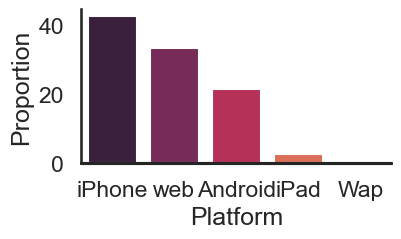

In [177]:
# Set up the matplotlib figure
f, (ax) = plt.subplots(1, 1, figsize=(4, 2), sharex=True)

# Generate some sequential data
x = np.array(list(source_proportion.source))
y = np.array(list(source_proportion.proportion))
sns.barplot(x=x, y=y, hue=x, palette="rocket", ax=ax, data=source_proportion)
ax.axhline(0, color="k", clip_on=False)
ax.set(xlabel='Platform', ylabel='Proportion') # подписываем оси


# Finalize the plot
sns.despine()

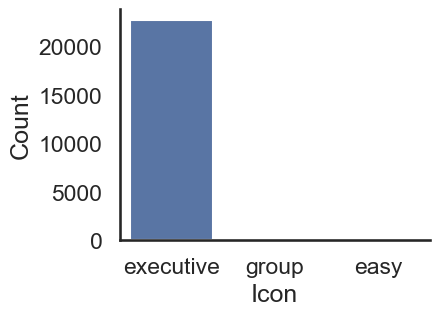

In [178]:
plt.figure(figsize=(4,3)) # указываем размер графика, чтобы он был побольше
a = sns.countplot(x='icon', data=taxi) # строим и записываем в переменную
a.set(xlabel='Icon', ylabel='Count') # подписываем оси
sns.despine() # убрать часть рамки графика
plt.show()

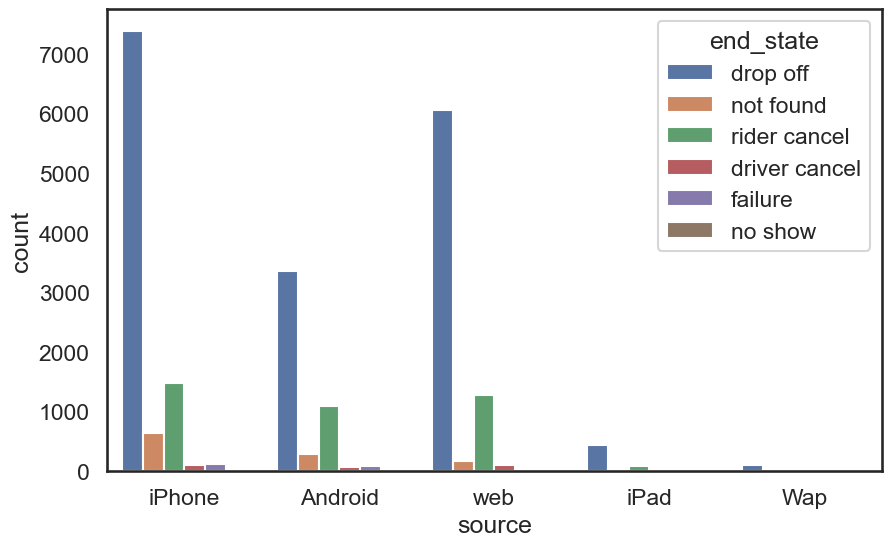

In [179]:
plt.figure(figsize=(10,6))
sns.countplot(data=taxi, hue='end_state', x='source') # строим график с нужными параметрами
plt.show()

In [180]:
driver_score_counts = taxi.driver_score\
                                .value_counts(normalize=True, dropna=True)\
                                .mul(100)\
                                .round(2)\
                                .reset_index()\
                                .rename(columns={'driver_score':'score','proportion': 'percentage'})\
                                .sort_values('score', ascending=False)
driver_score_counts.sort_values('score', inplace=True, ascending=False)

driver_score_counts

,score,percentage
0,5.0,58.81
1,4.0,21.88
3,3.0,2.97
5,2.0,0.81
4,1.0,1.23
2,0.0,14.30


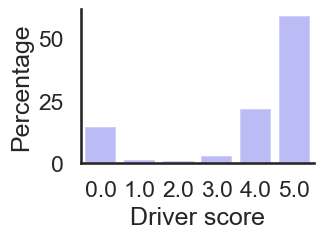

In [181]:
plt.figure(figsize=(3, 2))
ax = sns.barplot(x='score', y='percentage', data=driver_score_counts, color='blue', alpha=0.3)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика

In [182]:
rider_score_counts = (taxi.rider_score
                            .value_counts(normalize=True, dropna=True)
                            .mul(100)
                            .round(2)
                            .reset_index()
                            .rename(columns={'rider_score':'score','proportion': 'percentage'})
                      )
rider_score_counts.sort_values('score', inplace=True, ascending=False)
rider_score_counts

,score,percentage
0,5.0,87.10
1,4.0,8.83
3,3.0,1.38
5,2.0,0.19
4,1.0,0.21
2,0.0,2.29


In [183]:
driver_score_counts['group'] = 'driver'
rider_score_counts['group'] = 'rider'
driver_and_rider_score_counts = pd.concat([driver_score_counts, rider_score_counts], ignore_index=True)

In [184]:
driver_and_rider_score_counts

,score,percentage,group
0,5.0,58.81,driver
1,4.0,21.88,driver
2,3.0,2.97,driver
3,2.0,0.81,driver
4,1.0,1.23,driver
5,0.0,14.30,driver
6,5.0,87.10,rider
7,4.0,8.83,rider
8,3.0,1.38,rider
9,2.0,0.19,rider


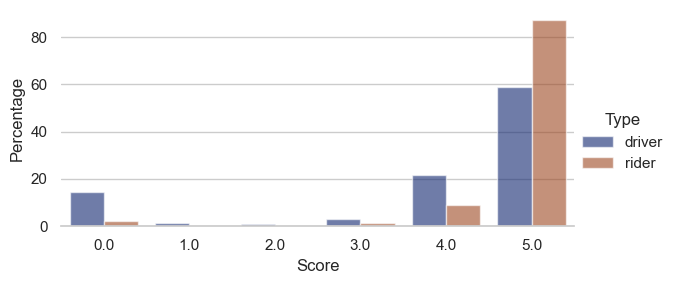

In [185]:
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=driver_and_rider_score_counts, kind="bar",
    x="score", y="percentage", hue="group",
    palette="dark", alpha=0.6, height=3, aspect=2
)
g.despine(left=True)
g.set_axis_labels("Score", "Percentage")
g.legend.set_title("Type")

Выводы:
Водители ставят меньше 0, чем клиенты.
Более чем в 80% случаев водители поставили клиентам 5 звездочек.